# Analisis de Arbol de decision


##### Importamos librerias  

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix



#### Importamos el documento 

In [229]:
df=pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Revisamos nulls

In [230]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [231]:
# Convertir todas las columnas del dfFrame a tipo float
df = df.astype(float).round(4)
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

#### Analizamos apartir del mapa de calor 


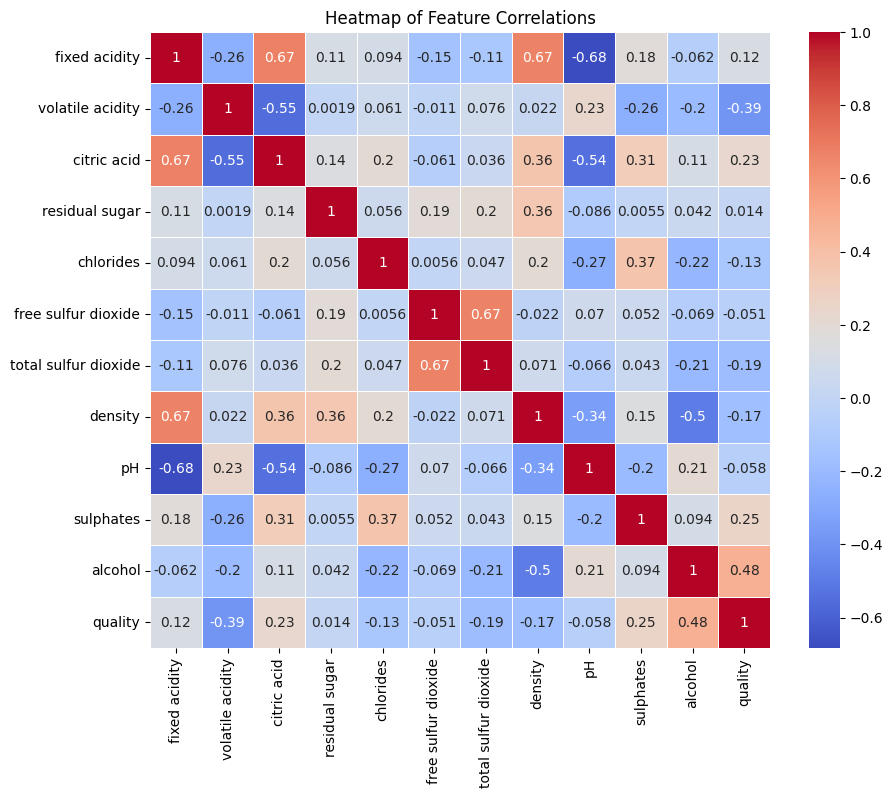

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor ')
plt.show()

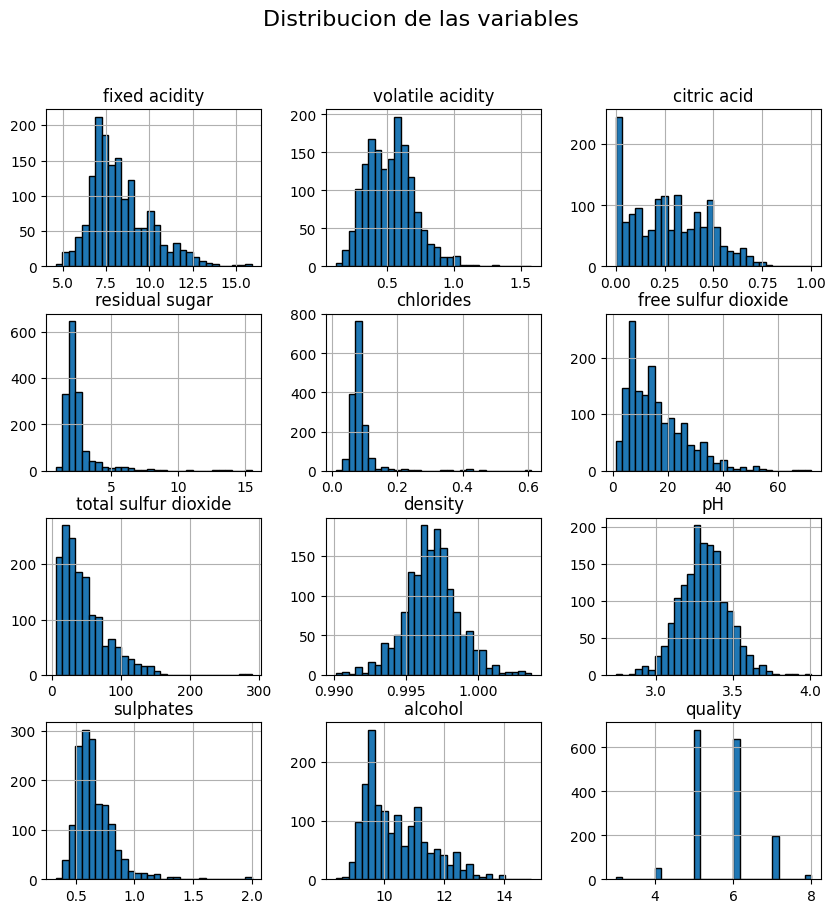

In [233]:
df.hist(figsize=(10,10),bins=30, edgecolor="black")
plt.suptitle("Distribucion de las variables",fontsize=16)
plt.show()

#### Variables con mayor correlacion 

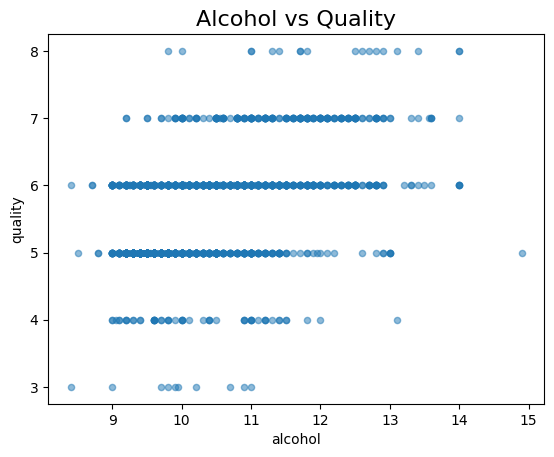

In [234]:
df.plot(kind='scatter',x="alcohol",y="quality",alpha=0.5)
plt.title("Alcohol vs Quality",fontsize=16)
plt.show()

In [235]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990100   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996800   
75%       0.090000            21.000000             62.000000     0.997800   
max       0.611000            72.000000            289.000000     1.003700   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Boxplot con datos atipicos 

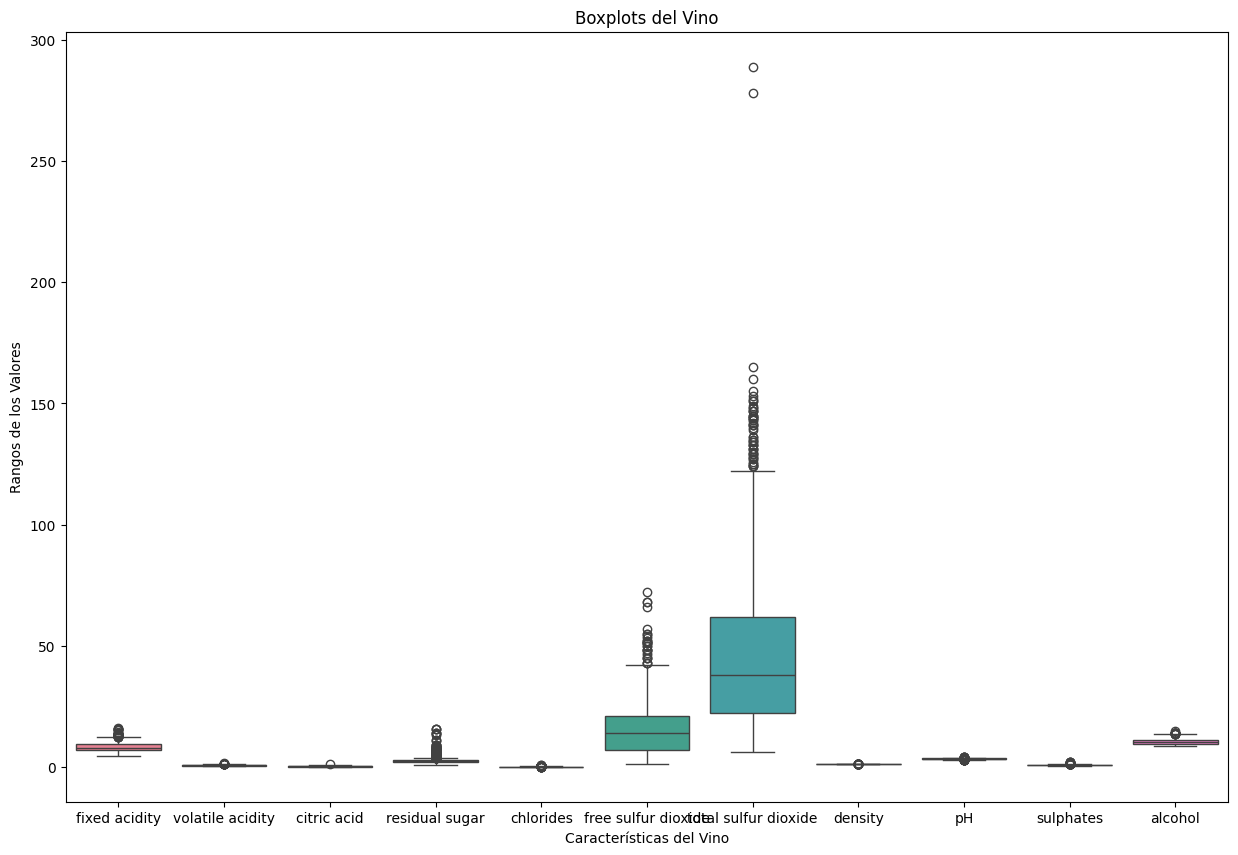

In [236]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=["quality"]))
plt.title('Boxplots del Vino')
plt.xlabel('Características del Vino')
plt.ylabel('Rangos de los Valores')
plt.show()


#### Eliminamos los datos atipicos del modelo para hacerlo mas preciso 

In [237]:
def eliminar_atipicos(df_2frame):
    df_2 = df_2frame.copy()

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1

    df_sin_atipicos = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_sin_atipicos


df_2 = eliminar_atipicos(df)

#### Data final

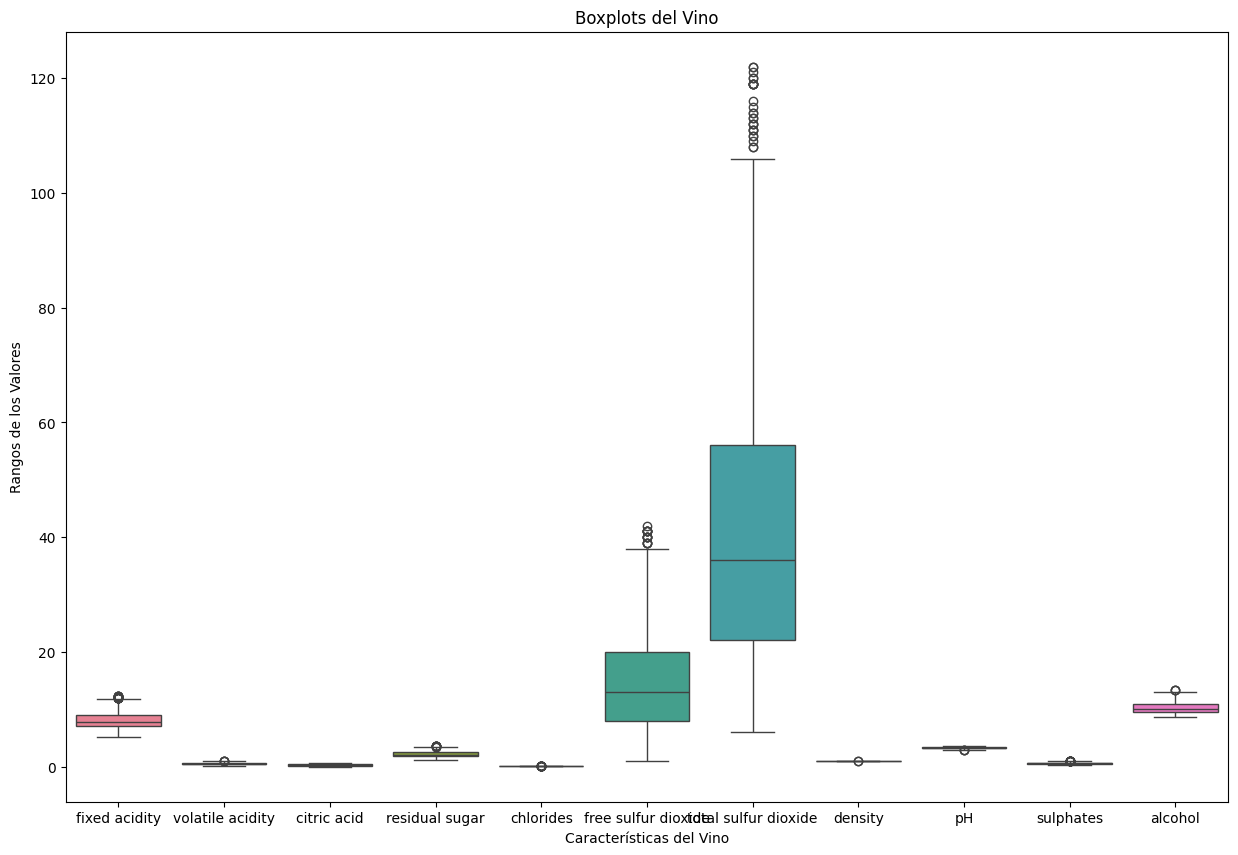

In [238]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_2.drop(columns=['quality']))
plt.title('Boxplots del Vino')
plt.xlabel('Características del Vino')
plt.ylabel('Rangos de los Valores')
plt.show()

#### Variables con mayor correlacion 

In [239]:

predictors_col = ["alcohol","sulphates","volatile acidity","density","citric acid"]        
target = df_2['quality']

In [240]:
predictors=df_2[predictors_col]

#### Definimos las variables de entrenamiento 

In [241]:
X_train,X_test,y_train,y_test =train_test_split(predictors,target,test_size=0.2,random_state=13)

In [242]:
target

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1179, dtype: float64

#### Correlacion entre los datos 

In [243]:
corr = predictors.corr()
corr

alcohol  sulphates  volatile acidity   density  citric acid
alcohol           1.000000   0.260783         -0.220600 -0.539402     0.137762
sulphates         0.260783   1.000000         -0.317346  0.081343     0.256747
volatile acidity -0.220600  -0.317346          1.000000  0.044764    -0.627194
density          -0.539402   0.081343          0.044764  1.000000     0.304955
citric acid       0.137762   0.256747         -0.627194  0.304955     1.000000

In [244]:
#la correlación entre cada variable y la calidad
correlations = df_2.corr()['quality'].abs().sort_values(ascending=False)
print(correlations)


quality                 1.000000
alcohol                 0.492551
sulphates               0.413533
volatile acidity        0.346962
density                 0.215254
citric acid             0.212133
total sulfur dioxide    0.203374
chlorides               0.190869
fixed acidity           0.113422
pH                      0.060288
residual sugar          0.007934
free sulfur dioxide     0.003609
Name: quality, dtype: float64


In [ ]:
tree=DecisionTreeClassifier()
arbol=tree.fit(X_train,y_train)

### ARBOL DE DECISION 

In [247]:
plt.figure(figsize=(100, 100))
plot_tree(arbol, feature_names=predictors.columns, filled=True, impurity=False, label='none', fontsize=10)

plt.show()

In [248]:
predicciones=arbol.predict(X_test)

In [249]:
predicciones

array([6., 6., 6., 5., 6., 6., 6., 7., 7., 5., 6., 4., 6., 5., 5., 5., 5.,
       6., 5., 6., 5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 5., 6., 5., 7.,
       4., 6., 7., 6., 6., 6., 5., 5., 5., 7., 5., 6., 6., 6., 6., 5., 6.,
       5., 7., 5., 5., 5., 5., 7., 7., 6., 5., 6., 7., 7., 5., 6., 5., 7.,
       5., 5., 6., 7., 5., 7., 6., 6., 5., 6., 7., 7., 5., 6., 4., 6., 5.,
       4., 7., 7., 5., 5., 5., 6., 6., 4., 7., 5., 4., 6., 6., 6., 5., 6.,
       5., 7., 5., 6., 5., 5., 5., 7., 5., 5., 5., 5., 6., 5., 6., 5., 5.,
       5., 6., 6., 6., 7., 6., 6., 6., 6., 6., 6., 6., 4., 5., 7., 5., 5.,
       5., 5., 6., 7., 5., 6., 5., 5., 6., 5., 5., 5., 6., 4., 4., 5., 6.,
       6., 5., 5., 5., 6., 6., 6., 5., 6., 6., 4., 6., 4., 5., 5., 5., 5.,
       6., 5., 6., 5., 5., 7., 6., 7., 5., 6., 5., 5., 5., 7., 6., 7., 6.,
       6., 6., 5., 6., 7., 7., 6., 5., 6., 6., 5., 5., 6., 6., 5., 6., 4.,
       6., 6., 5., 6., 5., 6., 6., 7., 5., 7., 6., 5., 6., 6., 6., 4., 6.,
       5., 6., 7., 5., 6.

In [250]:
pd.crosstab(y_test, predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones  4.0  5.0  6.0  7.0
Actual                          
4.0             0    6    0    1
5.0             9   69   22    6
6.0             4   20   54   14
7.0             0    0   18   13

### Base del Reporte

In [252]:

X = df_2.drop(columns=['quality'])
y = df_2['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Calcular y mostrar el reporte de clasificaciÛn
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Reporte de Clasificacion:\n", report)
print("Matriz de Confusion:\n", conf_matrix)

Reporte de Clasificacion:
               precision    recall  f1-score   support

         4.0       0.33      0.11      0.17         9
         5.0       0.70      0.67      0.68       102
         6.0       0.61      0.69      0.65        99
         7.0       0.52      0.50      0.51        26

    accuracy                           0.64       236
   macro avg       0.54      0.49      0.50       236
weighted avg       0.63      0.64      0.63       236

Matriz de Confusion:
 [[ 1  4  3  1]
 [ 1 68 30  3]
 [ 1 22 68  8]
 [ 0  3 10 13]]


### Mapa de difucion 

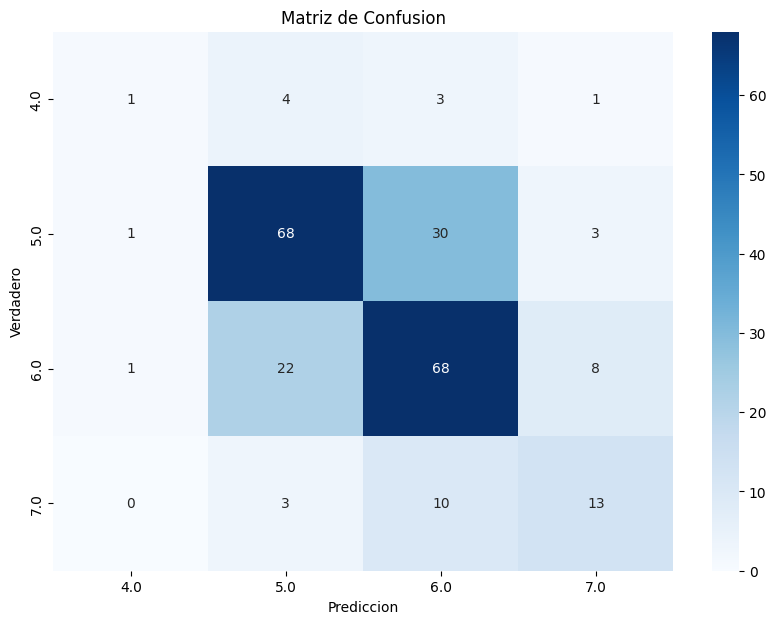

In [ ]:

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusion')
plt.show()

Análisis de Resultados de un Modelo de Clasificación para la Calidad del Vino
En el desarrollo de modelos de clasificación, una de las herramientas fundamentales para evaluar el desempeño es la matriz de confusión. En este análisis, la matriz generada muestra cómo el modelo clasifica diferentes niveles de calidad del vino, representados por valores numéricos que van del 4.0 al 7.0. Cada fila de la matriz representa el valor real de la calidad, mientras que cada columna muestra las predicciones realizadas por el modelo. A partir de estos datos, es posible explorar el rendimiento del modelo, identificar patrones y sugerir mejoras.

Interpretación General de la Matriz de Confusión
La matriz de confusión obtenida muestra cuatro niveles de calidad, clasificados en una escala del 4.0 al 7.0. La diagonal principal de la matriz representa los casos en los que el modelo ha clasificado correctamente la calidad del vino, es decir, cuando el valor predicho coincide con el valor real. Los valores fuera de esta diagonal representan errores de clasificación.

Por ejemplo, el modelo acertó 64 veces en clasificar correctamente el nivel de calidad 5.0 y 54 veces en clasificar correctamente el nivel de calidad 6.0. Estas cifras indican que el modelo tiene un buen rendimiento en la clasificación de vinos con calidades intermedias, lo cual sugiere que estas clases tienen características distintivas que el modelo puede aprender y reconocer con relativa facilidad.

Análisis de Errores de Clasificación

Sin embargo, existen varios errores de clasificación que merecen atención. Observamos que:

7 vinos de calidad 5.0 fueron clasificados como 4.0: Este error puede deberse a que las características de algunos vinos de calidad 5.0 son similares a las de los vinos de calidad 4.0. En términos de calidad, esto podría implicar que los límites entre las categorías 4.0 y 5.0 no están claramente definidos en las características observables del vino, lo cual genera confusión para el modelo.
4 vinos de calidad 6.0 fueron clasificados como 4.0: Este error es más significativo, ya que representa un salto de dos puntos en la escala de calidad. Esto podría indicar que el modelo no es suficientemente robusto para capturar todas las características de los vinos de calidad 6.0, o que existen ciertas observaciones atípicas en el conjunto de datos.
Algunos vinos de calidad 7.0 fueron clasificados incorrectamente como 6.0: Aunque el modelo generalmente clasifica bien los vinos de mayor calidad, parece haber cierta confusión entre las clases 6.0 y 7.0, lo que podría deberse a la similitud en las características químicas y organolépticas de estos vinos.
#Métricas de Desempeño: Precisión, Recall y F1-Score
#Para analizar el desempeño del modelo de manera más exhaustiva, podemos calcular las métricas de precisión, recall y F1-score para cada clase. Estas métricas nos proporcionarán información adicional sobre cómo el modelo maneja cada categoría de calidad:

Precisión: La precisión de cada clase mide la proporción de predicciones correctas para esa clase específica. Las clases 5.0 y 6.0, con más aciertos en la diagonal principal, probablemente presenten una precisión más alta en comparación con las clases 4.0 y 7.0.
Recall: El recall, o sensibilidad, muestra la capacidad del modelo para identificar correctamente cada clase. Si el modelo clasifica correctamente una alta proporción de vinos de calidad 5.0, su recall será elevado para esa clase.
F1-Score: El F1-score es una combinación de precisión y recall, y proporciona una medida general del desempeño en cada clase, penalizando los errores y resaltando las clases en las que el modelo tiene dificultades.